<h1 align='center'> Credit Risk Modeling Project</h1>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

### Load Data

In [3]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [4]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [5]:
df_customers.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

         state  zipcode  
0        Delhi   110001  
1   Tamil Nadu   600001  
2  West Bengal   700001

In [6]:
df_loans.head(3)

loan_id cust_id loan_purpose  loan_type  sanction_amount  loan_amount  \
0  L00001  C00001         Auto    Secured          3004000      2467000   
1  L00002  C00002         Home    Secured          4161000      3883000   
2  L00003  C00003     Personal  Unsecured          2401000      2170000   

   processing_fee     gst  net_disbursement  loan_tenure_months  \
0        49340.00  444060           1973600                  33   
1        77660.00  698940           3106400                  30   
2        43400.00  390600           1736000                  21   

   principal_outstanding  bank_balance_at_application disbursal_date  \
0                1630408                       873386     2019-07-24   
1                 709309                       464100     2019-07-24   
2                1562399                      1476042     2019-07-24   

  installment_start_dt  default  
0           2019-08-10    False  
1           2019-08-15    False  
2           2019-08-21    False

In [7]:
df_bureau.head(3)

cust_id  number_of_open_accounts  number_of_closed_accounts  \
0  C00001                        1                          1   
1  C00002                        3                          1   
2  C00003                        2                          1   

   total_loan_months  delinquent_months  total_dpd  enquiry_count  \
0                 42                  0          0              3   
1                 96                 12         60              5   
2                 82                 24        147              6   

   credit_utilization_ratio  
0                         7  
1                         4  
2                        58

In [8]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

   ... loan_amount  processing_fee     gst net_disbursement  \
0  ...     2467000        49340.00  444060          1973600   
1  ...     3883000        77660.00  698940          3106400   
2  ...     2170000        43400.00  390600          1736000   

  loan_tenure_months  principal_outstanding  bank_balance_at_application  \
0                 33                1630408                       873386   
1                 30                 709309                       464100   
2                 21                1562399                      1476042   

   disbursal_date  installment_start_dt  default  
0      2019-07-24            2019-08-10    False  
1      2019-07-24            2019-08-15    False  
2      2019-07-24            2019-08-21    False  

[3 rows x 26 columns]

In [9]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

   ... disbursal_date  installment_start_dt default number_of_open_accounts  \
0  ...     2019-07-24            2019-08-10   False                       1   
1  ...     2019-07-24            2019-08-15   False                       3   
2  ...     2019-07-24            2019-08-21   False                       2   

  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  \
0                         1                 42                  0          0   
1                         1                 96                 12         60   
2                         1                 82                 24        147   

   enquiry_count  credit_utilization_ratio  
0              3                         7  
1              5                         4  
2              6                        58  

[3 rows x 33 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [11]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### Train Test split

In [12]:
X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

cust_id  age gender marital_status employment_status    income  \
12746  C12747   59      M        Married     Self-Employed  11327000   
32495  C32496   44      F         Single          Salaried    715000   

       number_of_dependants residence_type  years_at_current_address  \
12746                     3          Owned                        30   
32495                     0          Owned                        27   

            city  ... disbursal_date  installment_start_dt  \
12746  Hyderabad  ...     2020-10-31            2020-11-11   
32495     Mumbai  ...     2022-10-22            2022-10-27   

      number_of_open_accounts number_of_closed_accounts total_loan_months  \
12746                       4                         2               152   
32495                       3                         1               160   

       delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  \
12746                 20        118              4                        36   
32495                 10         62              5                         5   

       default  
12746        0  
32495        0  

[2 rows x 33 columns]

<h3 align="center" >Data Cleaning</h3>

### Handle Missing & Duplicate Values

In [13]:
df_train.shape

(37500, 33)

In [14]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [18]:
df_train["residence_type"] = df_train["residence_type"].fillna(mode_residence)
df_test["residence_type"] = df_test["residence_type"].fillna(mode_residence)


df_train.residence_type.unique(), df_test.residence_type.unique()

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [19]:
df_train.duplicated().sum()

np.int64(0)

In [20]:
df_train.describe()

age      income  number_of_dependants  years_at_current_address  \
count 37500.00    37500.00              37500.00                  37500.00   
mean     39.54  2633326.16                  1.94                     16.00   
std       9.86  2623780.52                  1.54                      8.92   
min      18.00        0.00                  0.00                      1.00   
25%      33.00   802000.00                  0.00                      8.00   
50%      39.00  1885000.00                  2.00                     16.00   
75%      46.00  3326250.00                  3.00                     24.00   
max      70.00 11999000.00                  5.00                     31.00   

        zipcode  sanction_amount  loan_amount  processing_fee        gst  \
count  37500.00         37500.00     37500.00        37500.00   37500.00   
mean  418866.25       4699691.57   3996067.73        80290.68  719292.19   
std   169035.02       6257832.98   5371862.29       113128.14  966935.21   
min   110001.00             0.00         0.00            0.00       0.00   
25%   302001.00       1142000.00    961000.00        19220.00  172980.00   
50%   400001.00       2644000.00   2230000.00        44600.00  401400.00   
75%   560001.00       5178000.00   4619000.00        92420.00  831420.00   
max   700001.00      52175000.00  47819000.00      5293543.52 8607420.00   

       net_disbursement  ...  principal_outstanding  \
count          37500.00  ...               37500.00   
mean         3196854.19  ...             1333819.51   
std          4297489.83  ...             1213674.44   
min                0.00  ...                  -1.00   
25%           768800.00  ...              422197.50   
50%          1784000.00  ...              997427.50   
75%          3695200.00  ...             1784879.00   
max         38255200.00  ...             5000000.00   

       bank_balance_at_application  number_of_open_accounts  \
count                     37500.00                 37500.00   
mean                     986298.87                     2.50   
std                     1043145.01                     1.12   
min                           0.00                     1.00   
25%                      287040.25                     1.00   
50%                      665014.50                     3.00   
75%                     1234062.75                     4.00   
max                     7846643.00                     4.00   

       number_of_closed_accounts  total_loan_months  delinquent_months  \
count                   37500.00           37500.00           37500.00   
mean                        1.00              76.11               4.84   
std                         0.81              43.77               5.84   
min                         0.00               1.00               0.00   
25%                         0.00              42.00               0.00   
50%                         1.00              71.00               3.00   
75%                         2.00             107.00               8.00   
max                         2.00             223.00              24.00   

       total_dpd  enquiry_count  credit_utilization_ratio  default  
count   37500.00       37500.00                  37500.00 37500.00  
mean       26.67           5.01                     43.42     0.09  
std        32.78           2.03                     29.39     0.28  
min         0.00           1.00                      0.00     0.00  
25%         0.00           4.00                     18.00     0.00  
50%        13.00           5.00                     39.00     0.00  
75%        46.00           6.00                     67.00     0.00  
max       171.00           9.00                     99.00     1.00  

[8 rows x 21 columns]

In [21]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [22]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

### Box plot to visualize outliers

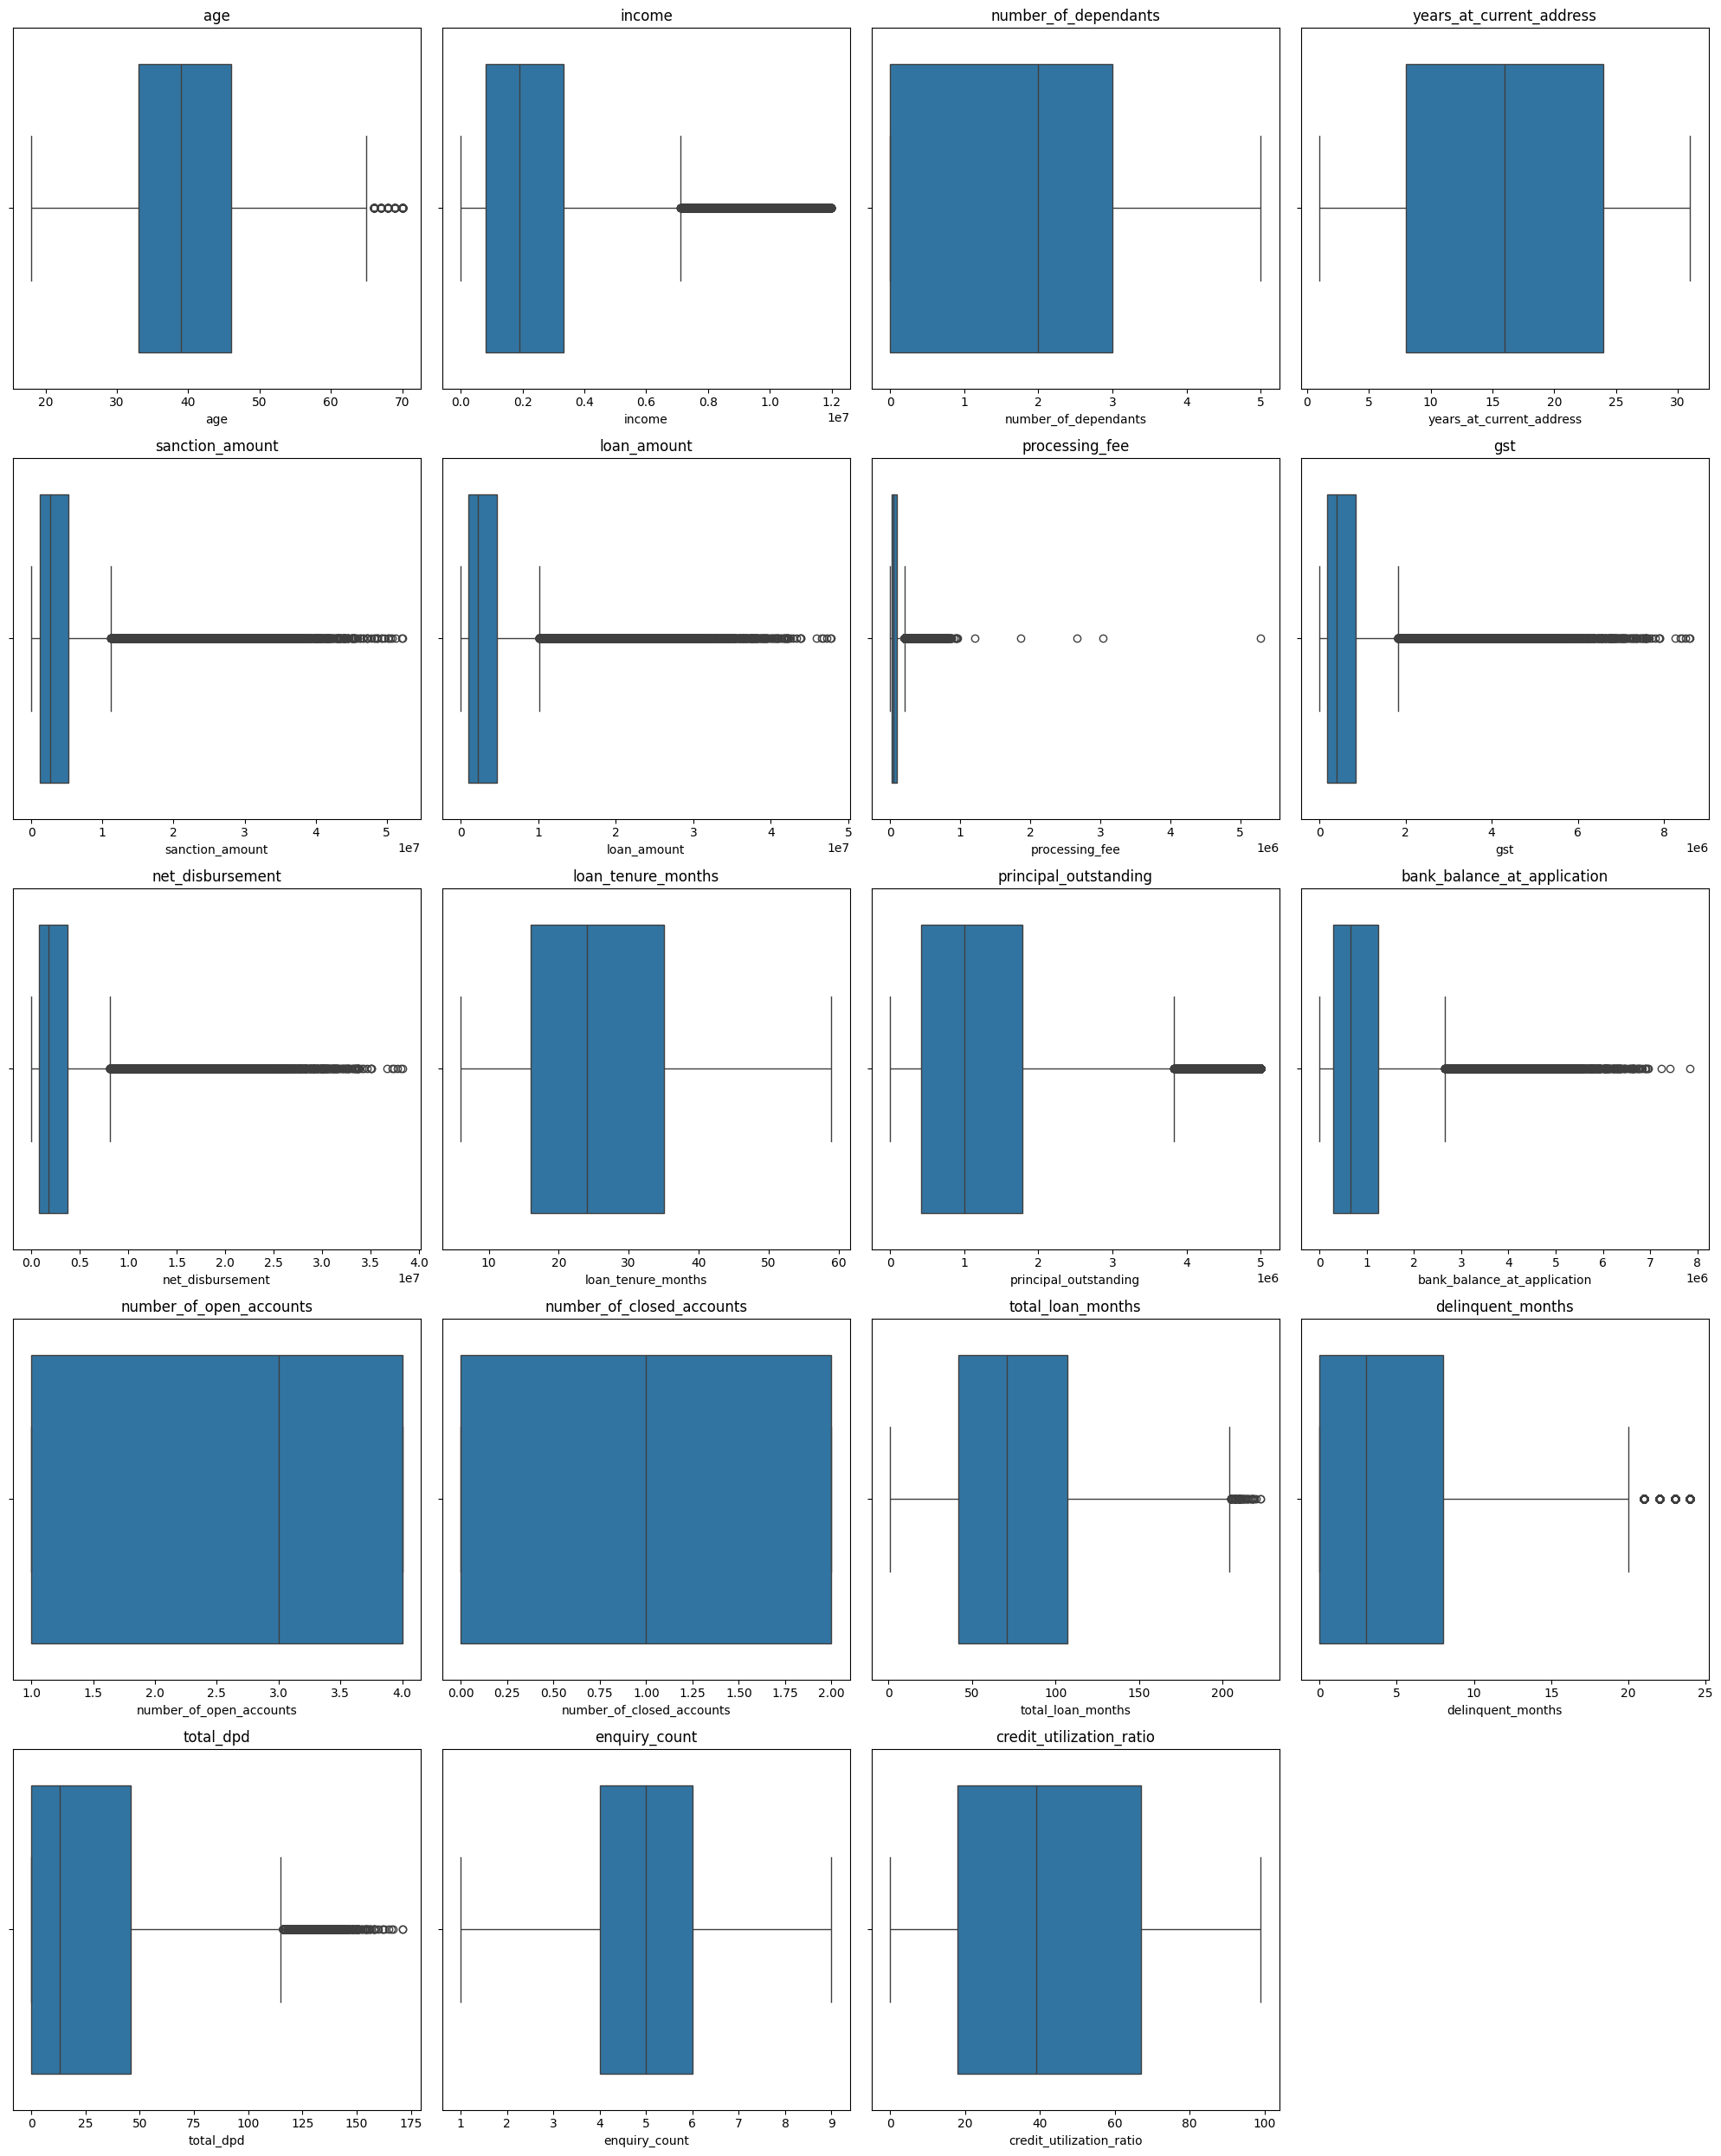

In [23]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

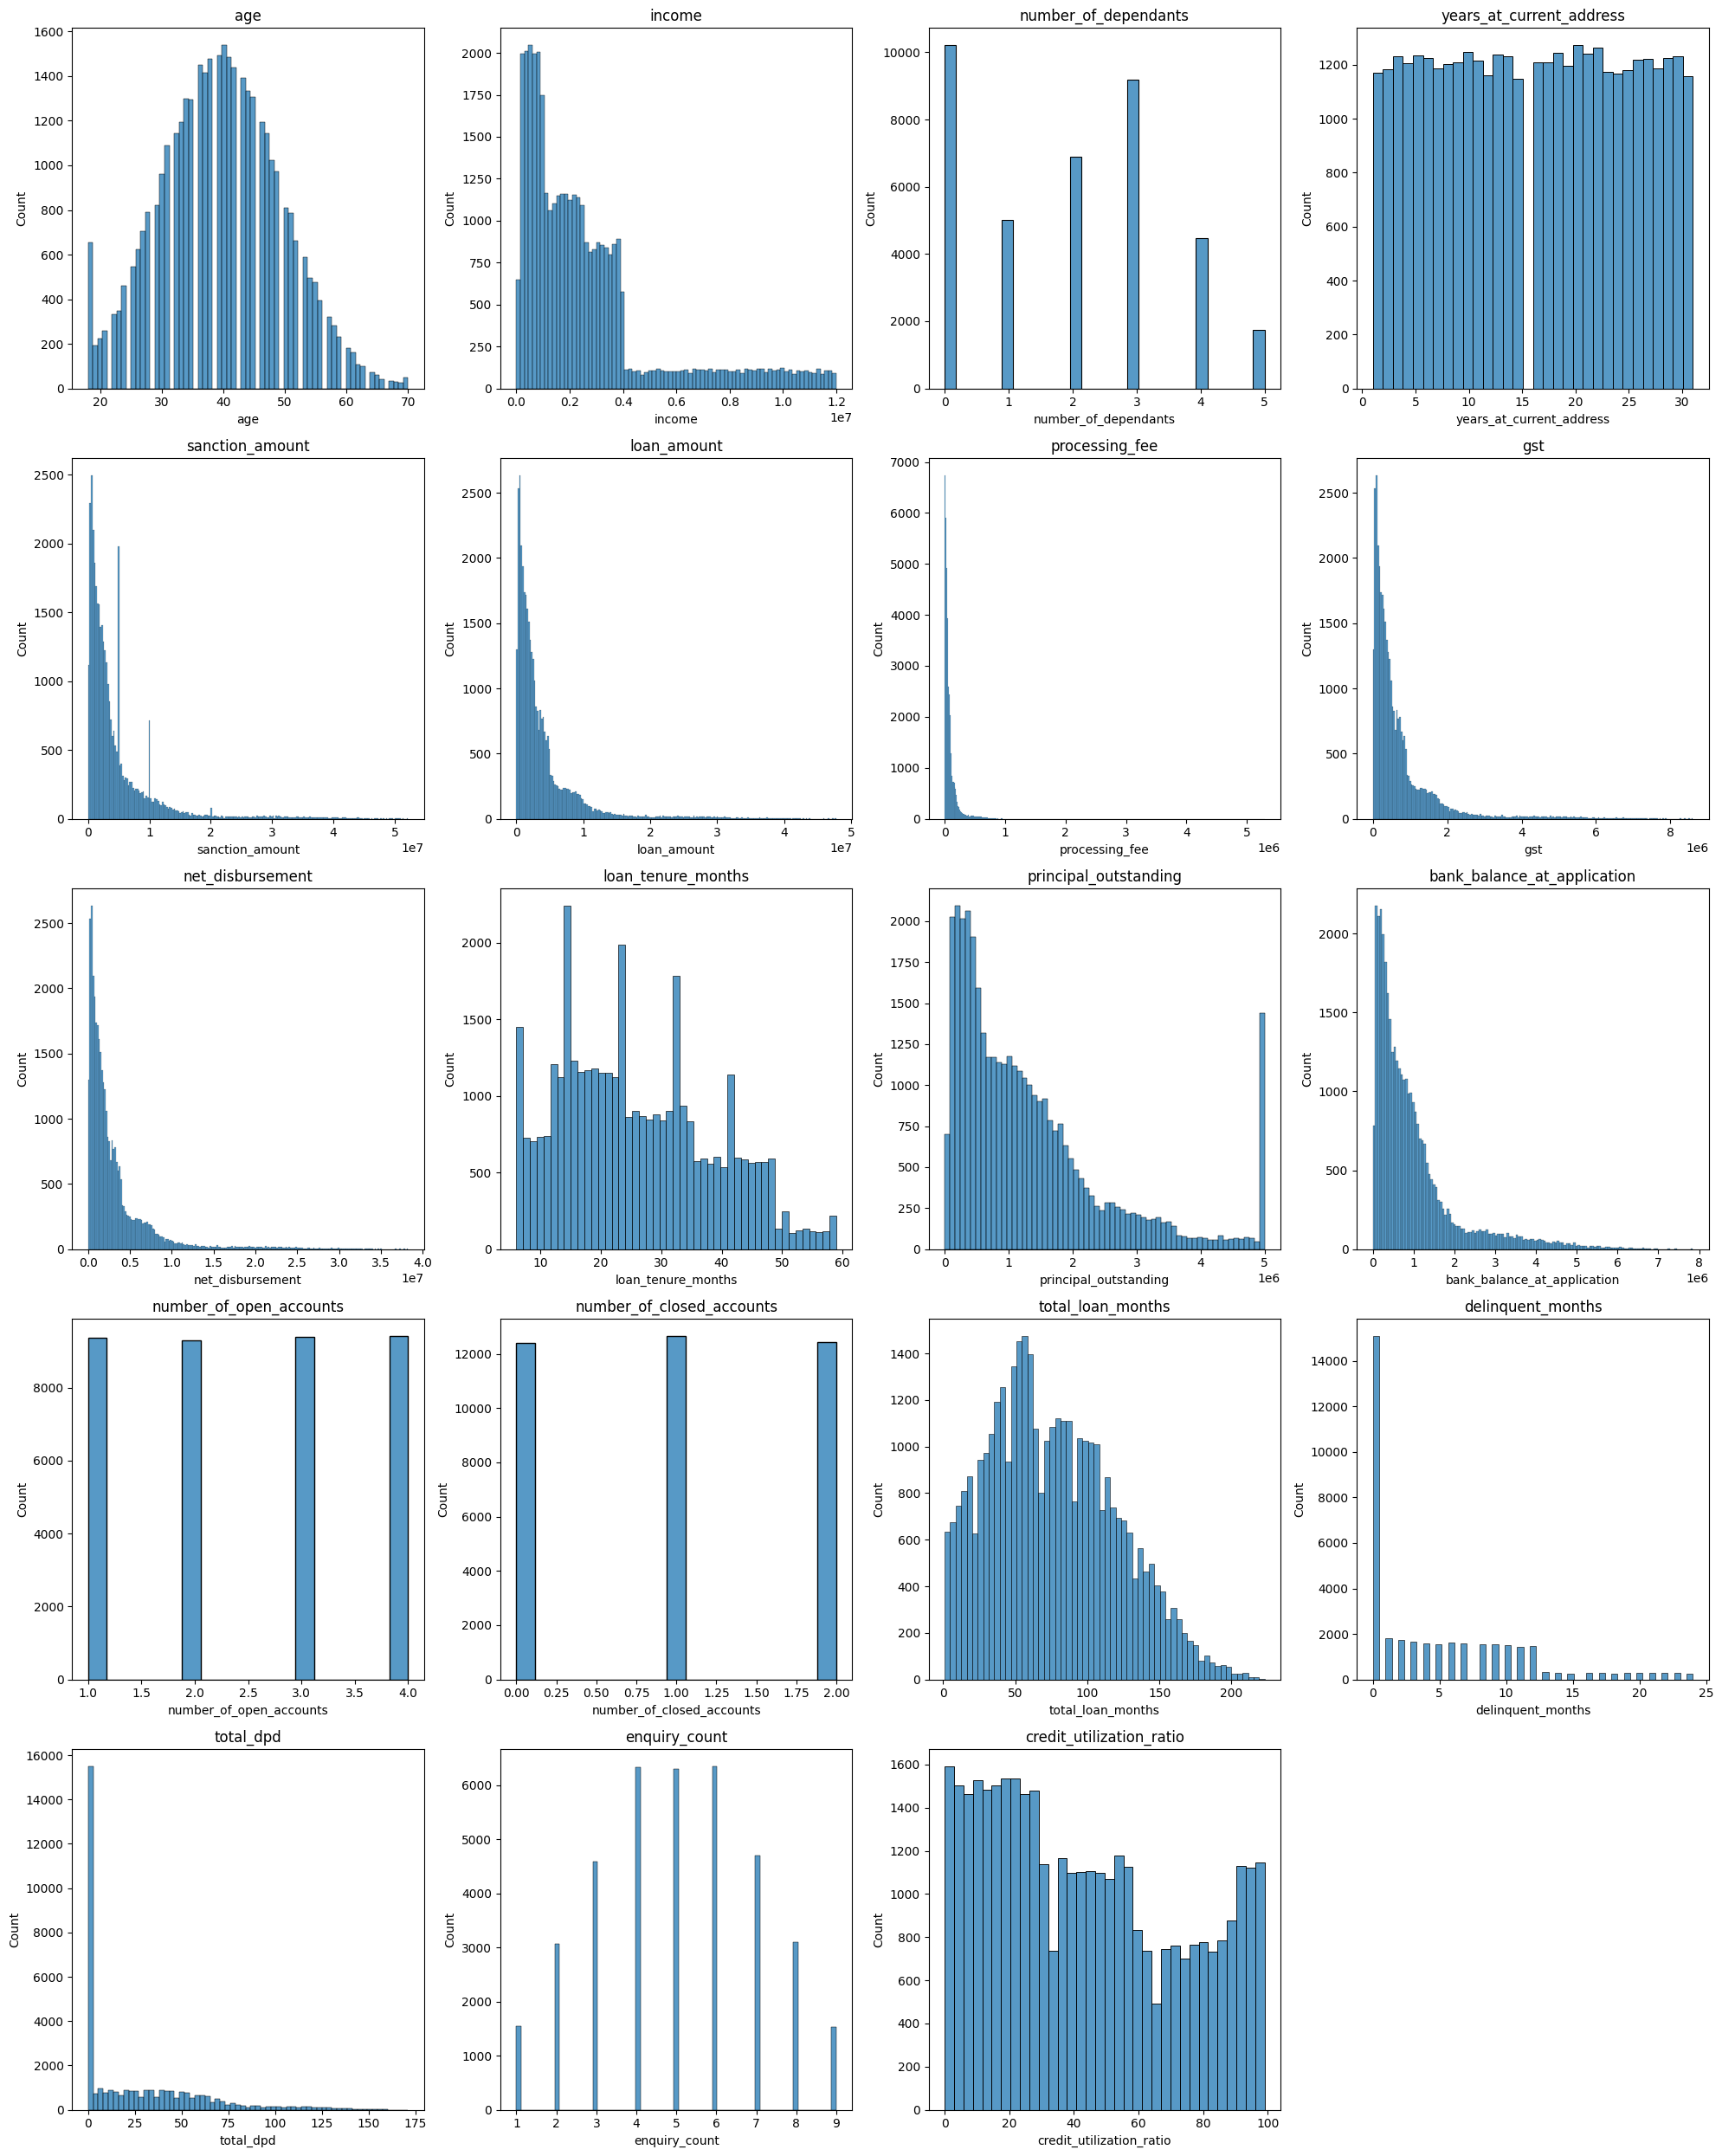

In [24]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Outlier Removal: Processing Fee

In [25]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [26]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

loan_amount  processing_fee
23981      2234000      2669791.02
28174       966000      1214492.67
47089      1738000      1858964.77
29305      2616000      3036378.01
9898       3626000      5293543.52

In [27]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37488, 33)

In [28]:
df_test.residence_type.isna().sum()

np.int64(0)

In [29]:
# Apply same step on test set
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

In [30]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%

df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2].shape

(0, 33)

In [31]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

No rows found that breaks rule 1 and rule 2

### Analyze Categorical Columns

In [32]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [33]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


### Fix Errors in Loan Purpose Column

In [34]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [35]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)